In [101]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
with open('../../Downloads/new.json') as data_file:
    data = json.load(data_file)[0]

In [103]:
data

{'User': [{'id': 237064165,
   'first_name': 'Shynggyskhan',
   'last_name': 'Turganbekov',
   'is_closed': False,
   'can_access_closed': True,
   'sex': 2,
   'bdate': '21.6.1999',
   'photo_100': 'https://vk.com/images/camera_100.png?ava=1',
   'has_photo': 0,
   'last_seen': {'time': 1562467404, 'platform': 7},
   'verified': 0,
   'followers_count': 63,
   'blacklisted': 0,
   'blacklisted_by_me': 0,
   'career': [],
   'military': [],
   'university': 0,
   'university_name': '',
   'faculty': 0,
   'faculty_name': '',
   'graduation': 0,
   'home_town': '',
   'personal': {'people_main': 0,
    'life_main': 0,
    'smoking': 0,
    'alcohol': 0,
    'religion_id': 0},
   'music': '',
   'movies': '',
   'tv': '',
   'books': '',
   'games': '',
   'universities': [],
   'schools': [],
   'about': '',
   'relatives': []}],
 'friends_count': 152,
 'post': [{'id': 449,
   'from_id': 237064165,
   'owner_id': 237064165,
   'date': 1494771047,
   'post_type': 'post',
   'text': '',
 

In [119]:
users = {}
user_id = data['User'][0]['id']
users['user_id'] = user_id
if 'first_name' in data['User'][0]:
    name = data['User'][0]['first_name']
    users['name'] = name
if 'last_name' in data['User'][0]:
    surename = data['User'][0]['last_name']
    users['surename'] = surename
if 'sex' in data['User'][0]:
    sex = 'Female' if data['User'][0]['sex'] == 1 else 'Male'
    users['sex'] = sex
if 'bdate' in data['User'][0]:
    bdate = data['User'][0]['bdate']
    users['bdate'] = bdate
if 'city' in data['User'][0]:
    city = data['User'][0]['city']['title']
    users['city'] = city
if 'country' in data['User'][0]:
    country = data['User'][0]['country']['title']
    users['country'] = country
followers = data['User'][0]['followers_count']# podpis4iki
friends = data['friends_count']
female_friends = data['female']
male_friends = data['male']

In [120]:
users

{'user_id': 237064165,
 'name': 'Shynggyskhan',
 'surename': 'Turganbekov',
 'sex': 'Male',
 'bdate': '21.6.1999'}

Female  22 
Male  130


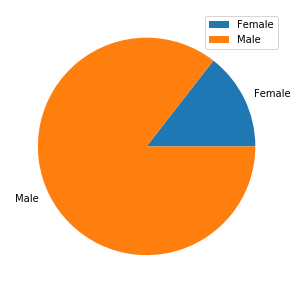

In [106]:
d = pd.DataFrame({'': [female_friends, male_friends]},
                   index=['Female', 'Male'])
plot = d.plot.pie(y='', figsize=(5, 5))
print('Female ', female_friends, '\nMale ', male_friends)

In [107]:
df = pd.DataFrame(columns=['date', 'comments', 'likes', 'reposts', 'views'])

In [108]:
#posts = []
print('Kolvo postov: ', len(data['post']))
for i in range(len(data['post'])):
    date = datetime.fromtimestamp(data['post'][i]['date'])
    comments = data['post'][i]['comments']['count']
    likes = data['post'][i]['likes']['count']
    reposts = data['post'][i]['reposts']['count']
    views = data['post'][i]['views']['count']
    
    post = {'date':date, 'comments':comments, 'likes':likes, 'reposts':reposts, 'views':views}
    #posts.append(post)
    df = df.append(post, ignore_index=True)


Kolvo postov:  7


In [109]:
df

,date,comments,likes,reposts,views
0,2017-05-14 20:10:47,0,14,1,1267
1,2019-07-07 00:53:06,0,1,0,26
2,2019-06-14 09:55:22,0,0,0,24
3,2019-05-26 19:47:12,0,1,0,36
4,2019-05-11 23:50:45,0,1,0,52
5,2018-07-05 11:49:17,0,5,0,245
6,2017-12-10 21:29:39,2,5,0,246


In [110]:
df['weekday'] = df['date'].dt.day_name()
df['year'] = [d.year for d in df.date]
df['month'] = [d.month for d in df.date]
df['hour'] = [d.hour for d in df.date]
df['day'] = [d.day for d in df.date]

In [111]:
df

,date,comments,likes,reposts,views,weekday,year,month,hour,day
0,2017-05-14 20:10:47,0,14,1,1267,Sunday,2017,5,20,14
1,2019-07-07 00:53:06,0,1,0,26,Sunday,2019,7,0,7
2,2019-06-14 09:55:22,0,0,0,24,Friday,2019,6,9,14
3,2019-05-26 19:47:12,0,1,0,36,Sunday,2019,5,19,26
4,2019-05-11 23:50:45,0,1,0,52,Saturday,2019,5,23,11
5,2018-07-05 11:49:17,0,5,0,245,Thursday,2018,7,11,5
6,2017-12-10 21:29:39,2,5,0,246,Sunday,2017,12,21,10


# count of avg(likes) per weekday

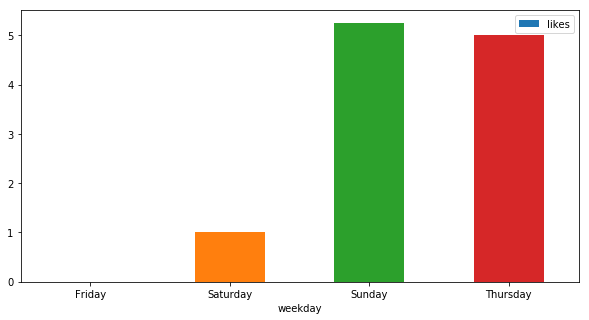

In [112]:
df['likes'] = df['likes'].astype(int)
d = df.groupby('weekday')['likes'].mean()
d = pd.DataFrame({'weekday': d.index, 'likes': d.values})
d.plot.bar(x='weekday', y='likes', rot=0, figsize=(10, 5));

# count mean of comments per weekday

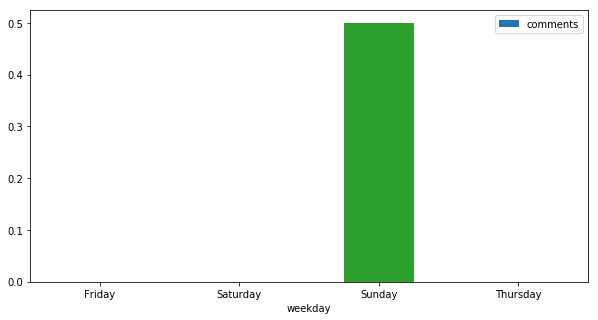

In [113]:
df['comments'] = df['comments'].astype(int)
d = df.groupby('weekday')['comments'].mean()
#print(d.values)

#d = data.groupby('weekday')['comments'].sum()
d = pd.DataFrame({'weekday': d.index, 'comments': d.values})
d.plot.bar(x='weekday', y='comments', rot=0, figsize=(10, 5));

In [114]:
d = df[df['year']==2019]

# Count of posts per month in last year

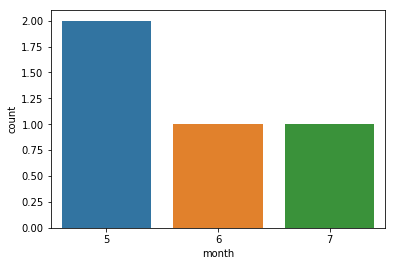

In [115]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'month', data = d);

# when is the best time to post (likes)

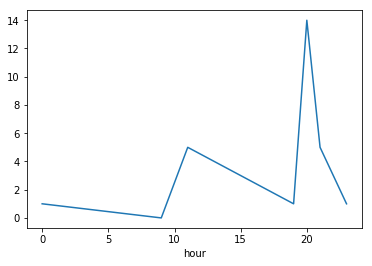

In [116]:
# for likes
df.groupby('hour')['likes'].sum().plot();

# when is the best time to post (coments)

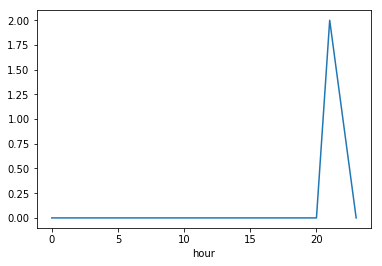

In [117]:
#for comments
df.groupby('hour')['comments'].sum().plot();

In [118]:

df[df['likes'] == df.likes.max()]


,date,comments,likes,reposts,views,weekday,year,month,hour,day
0,2017-05-14 20:10:47,0,14,1,1267,Sunday,2017,5,20,14
